<a href="https://colab.research.google.com/github/DarkDk123/Dog-Breed-Classification/blob/main/Dog-Breed-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 Dog Breeds Classification Using Tensorflow

Have you ever seen a dog and wondered what breed it is?

I have. And then someone says, *"it's a BullDog"* and you think, how did they know that?


<img width=30% src="https://media1.tenor.com/m/InjqAJQgZngAAAAd/star-wars-get-ready-for-battle-boys.gif">

In this project we're going to be using machine learning to help us identify different breeds of dogs.

To do this, we'll be using data from the [Kaggle dog breed identification competition](https://www.kaggle.com/c/dog-breed-identification/overview). It consists of a collection of **10,000+ labelled images** of **120 different dog breeds.**

This kind of problem is called **multi-class image classification**. It's multi-class because we're trying to classify mutliple different breeds of dog.

Multi-class image classification is an important problem because it's the same kind of technology Tesla uses in their self-driving cars or Airbnb uses in automatically adding information to their listings.

Since the most important step in a deep learning problem is **getting the data ready** *(turning it into numbers)*, that's what we're going to start with.

---
### **We're going to go through the following TensorFlow/Deep Learning workflow:** 🚀

#### **1. Problem Definition**

We need to identify a Dog's breed based on it's image, classifying a dog into almost 120 different classes of breeds.

#### **2. Get data ready for Training**

- **A. Downloading and storing data (download from Kaggle, store, import):**\
- **B. Prepare the data *(preprocessing, the 3 sets i.e. train, test, validation And  Separating X & y).***

#### **3. Choose and fit/train a model.**

Based on the type of problem, either using a pretrained (TensorFlow Hub or other) model, or training one from scratch.\
([TensorFlow Hub](https://www.tensorflow.org/hub), `tf.keras.applications`, [TensorBoard](https://www.tensorflow.org/tensorboard), [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping))

#### **4. Evaluating a model.**

Making predictions on **validation set**, comparing them with the ground truth labels, and according moving further.

#### **5. Improve the model through experimentation.**

Start with few 1000 images, make sure it works then increase the number of images accordingly.

#### **6. Save, sharing and reloading your model**
Saving the model once **reasonable results** are achieved.

---

### Getting our workspace ready

Before we get started, since we'll be using **TensorFlow 2.x** and **TensorFlow Hub (TensorFlow Hub)**. So make sure all the packages are installed as in [`requirements.txt`](./requirements.txt).

As we'll require a **GPU** for this intensive training, please use a **GPU** or Google Colab for free resources.\
All of the packages come pre-installed with it.


Now, let's start by downloading the data.

### **Getting data ready for Training**

##### **Downloading & Storing the data.**

Since much of machine learning is getting your data ready to be used with a machine learning model, we'll take extra care getting it setup.

There are a few ways we could do this. Many of them are detailed in the [Google Colab notebook on I/O (input and output)](https://colab.research.google.com/notebooks/io.ipynb).

And because the data we're using is hosted on Kaggle, we could even use the [Kaggle API](https://www.kaggle.com/docs/api).

This is great but what if the data you want to use wasn't on Kaggle?

**[Optional for colab]**\
One method is to **upload it to your Google Drive**, mount your drive in this notebook and import the file.

In [1]:
# Running this cell will provide you with a token to link your drive to this notebook
from google.colab import drive

# drive.mount("/content/drive")

Following the prompts from the cell above, if everything worked, you should see a "drive" folder available under the Files tab.

This means we'll be able to access files in our Google Drive right in this notebook.

For this project, I've [downloaded the data from Kaggle](https://www.kaggle.com/c/dog-breed-identification/data) and uploaded it to my Google Drive as a .zip file under the folder "Data".

Or alternatively you can use Kaggle API ***(token required!)***

```python
mv "kaggle.json" "/root/.kaggle/" # move kaggle key to path

kaggle competitions download -c dog-breed-identification # download using API
```

Finally, to access it, we'll have to unzip it.\
***(Or unzip it locally)***

```python
# Use the '-d' parameter as the destination for where the files should go
!unzip "drive/My Drive/Data/dog-breed-identification.zip" -d "drive/My Drive/Data/"
```

*Note: Paths can differ.*

Now All of our data should be in `/data` folder.


---

Before going further on exploring & preprocessing data.

Let's rerun some import statements. And check whether or not we're using a ***GPU***.

In [2]:
# Importing tensorflow & tf_hub
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (Oh Yeahhh!!!!)" if tf.config.list_physical_devices("GPU") else "not available ;(")

TF version: 2.17.1
Hub version: 0.16.1
GPU not available ;(


##### **Accessing & Exploring the Data**

Now the data files we're working with are available, we can explore it now!

Let's start with `labels.csv` which contains all of the image ID's and their assosciated dog breed (our data and labels).

In [3]:
# Change working directory to our project in Drive.
%cd /content/drive/MyDrive/Dog-Vision/

# Pandas to read this
import pandas as pd

# Read in the labels csv file
labels_csv = pd.read_csv("./data/labels.csv")

labels_csv.head() # Explore more in colab's interactive table (or use MS data wrangler)

/content/drive/MyDrive/Dog-Vision


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
print("Number of images:", len(labels_csv))

# Descriptive statistics
labels_csv.describe()

Number of images: 10222


,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


By this, we can see there are ***10222*** different ID's (meaning 10222 different images) and ***120 different breeds***.

Let's count how many images there are of each breed. Or which breed has the dominance here & which not...

In [5]:
# Value counts
labels_csv["breed"].value_counts()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
brabancon_griffon,67
komondor,67


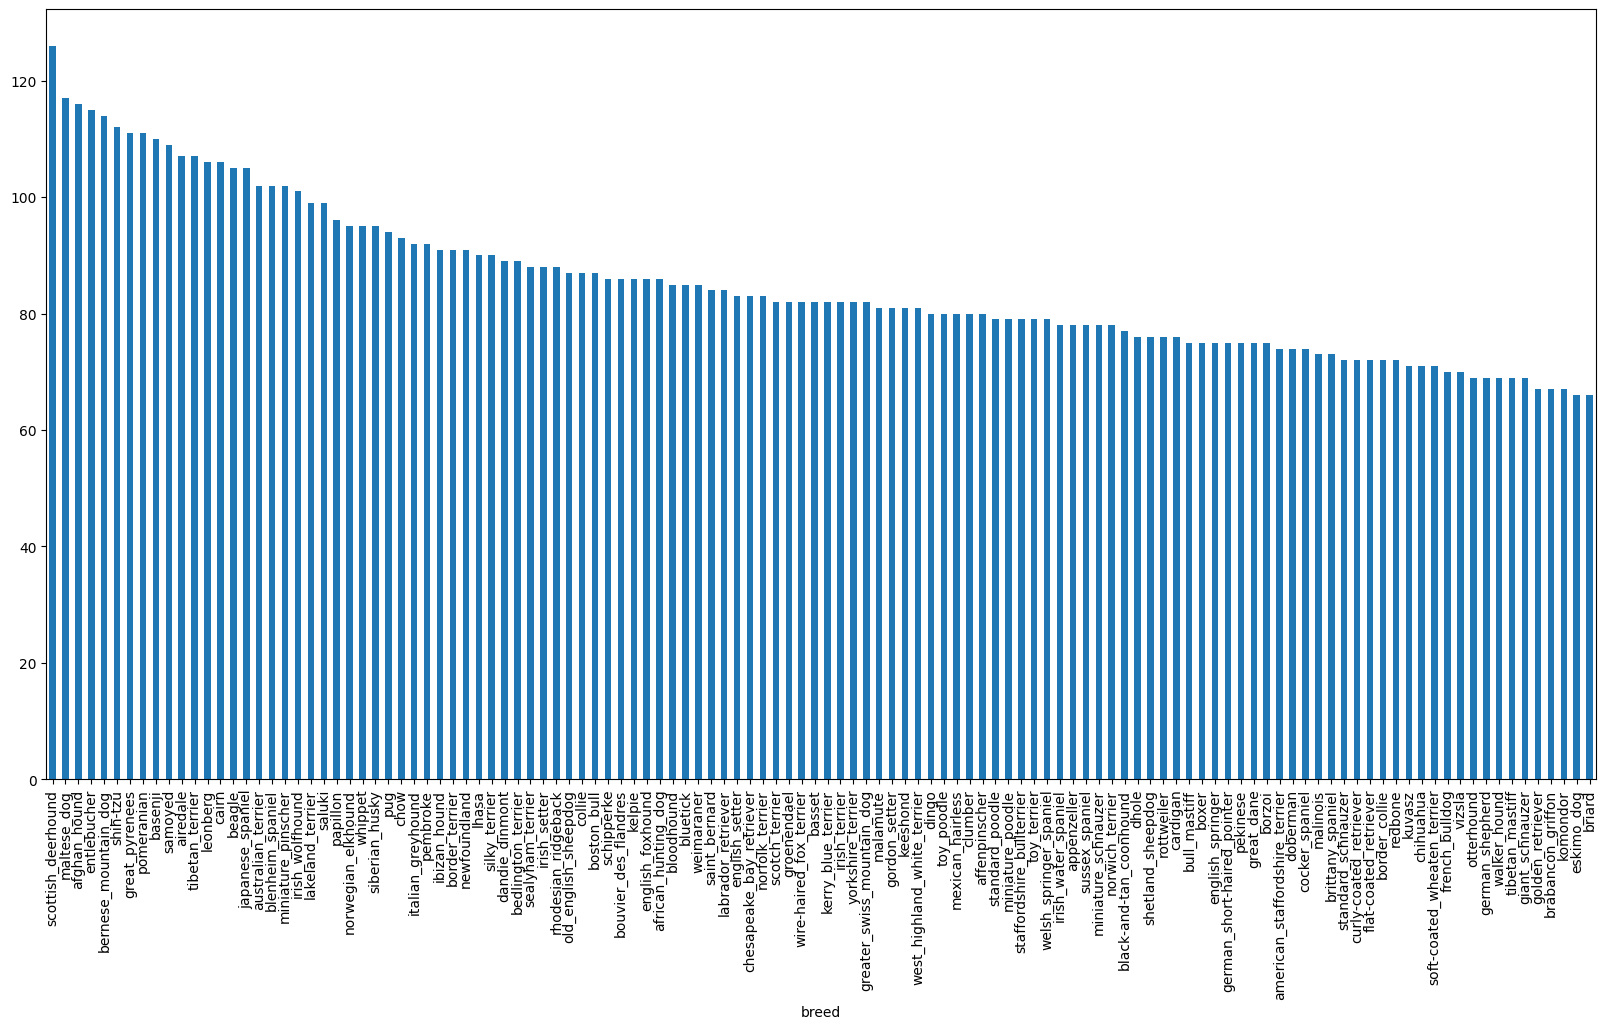

In [6]:
# Let's plot on a bar plot

labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [7]:
# Average no. of training images per breed.
labels_csv.breed.value_counts().mean()

85.18333333333334

Great!! we can see there's about **60-70+** images for each dog breed. On average we've **85 images** for each breed

This is a good amount as for some of their vision products [Google recommends a minimum of 10 images per class to get started](https://cloud.google.com/vision/automl/object-detection/docs/prepare).

And as we know, the more training data (images here), the more model has to figure out patterns between them.

Let's see one of the beautiful dog images.

It may take some time. (lots of images)

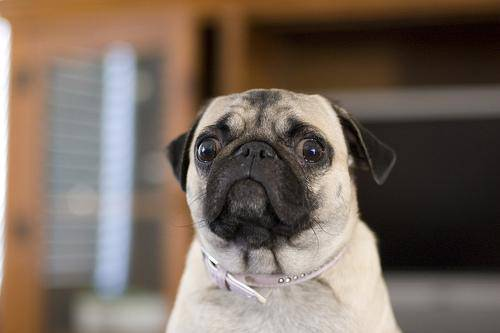

In [8]:
# Look "vodafon wala kutta!"
from IPython.display import display, Image
Image("./data/train/f6575543e0456836d1fc6871e586a6e0.jpg")

##### **Getting images and their labels**

Since we've got the image ID's and their labels in a DataFrame (`labels_csv`), we'll use it to create:
* A list a filepaths to training images (absolute paths)
* An array of all labels
* An array of all unique labels

We'll only create a list of **filepaths to images** rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

In [9]:
# Let's create a series of filepaths to corresponding images.
# Working with absolute paths.

pd.set_option('max_colwidth', 400) # Increase column width

file_paths = "/content/drive/MyDrive/Dog-Vision/train/" + labels_csv['id'] + ".jpg"

file_paths.head() # Wonderful

,id
0,/content/drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,/content/drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,/content/drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg
3,/content/drive/MyDrive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,/content/drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg


Now that we've got a Series of all the *filepaths* from the ID column of `labels_csv`, we should verify it with our corresponding **training data images**

They should be equal, if not, then we've done something wrong while unzipping our data.

Let's see -

In [10]:
# Number of filepaths matches number of actual image files or not?!

import os
if (_tot:=len(os.listdir("./data/train"))) == len(file_paths):
  print(f"Filenames match actual amount of files!, Total files are: {_tot}")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!, Total files are: 10222


DOG Breed: boxer


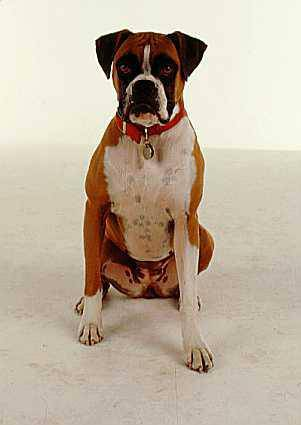

In [11]:
# Let's check a random Dog from filepaths.

_rimg = file_paths.sample(1)

print("DOG Breed:", labels_csv.loc[_rimg.index, "breed"].values[0])
Image(_rimg.values[0])

Woah! Cute Dog!! ❤️‍🔥

Now we've got our **image filepaths** together, let's get the labels.

Now lets do the same thing as before, compare the amount of labels to number of filenames.

##### **Conveting label data into numbers (NumPy Arrays)**

We'll take them from `labels_csv` and turn them into a NumPy array.

NumPy array's are fast & efficient for further preprocessing!!

We'll also find all of the unique dog breed names.

In [12]:
# Checking all images matches number of lables or not!

if len(labels_csv['id']) == len(file_paths):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [13]:
labels = labels_csv["breed"].to_numpy()
unique_breeds = labels_csv["breed"].unique()

# look, labels as np array
print(labels[:10], "...Many more")

# Let's see unique labels
print("\n\nTotal unique breeds", len(unique_breeds),"\n\nUnique breed labels:", unique_breeds)

['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'bedlington_terrier' 'borzoi' 'basenji'
 'scottish_deerhound'] ...Many more


Total unique breeds 120 

Unique breed labels: ['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'borzoi' 'basenji' 'scottish_deerhound'
 'shetland_sheepdog' 'walker_hound' 'maltese_dog' 'norfolk_terrier'
 'african_hunting_dog' 'wire-haired_fox_terrier' 'redbone'
 'lakeland_terrier' 'boxer' 'doberman' 'otterhound' 'standard_schnauzer'
 'irish_water_spaniel' 'black-and-tan_coonhound' 'cairn' 'affenpinscher'
 'labrador_retriever' 'ibizan_hound' 'english_setter' 'weimaraner'
 'giant_schnauzer' 'groenendael' 'dhole' 'toy_poodle' 'border_terrier'
 'tibetan_terrier' 'norwegian_elkhound' 'shih-tzu' 'irish_terrier'
 'kuvasz' 'german_shepherd' 'greater_swiss_mountain_dog' 'basset'
 'australian_terrier' 'schipperke' 'rhodesian_ridgeback' 'irish_setter'
 'appenzeller' 'bloodhound' 'samoyed' 'miniatur

Finally, since a machine learning model can't take strings as input (what `labels` currently is), we'll have to convert our labels to numbers.

Then we'll go through the list of `labels` and compare them to unique breeds and create a boolean array indicating which one is the real label (`True`) and which ones aren't (`False`).

This will convert our target labels into boolean arrays, representing particular breeds.

Now use `unique_breeds` to help turn our `labels` array into an array of booleans.


In [14]:
# Example: Turn one label into an array of booleans
print(labels[0])
print(labels[0] == unique_breeds) # use comparison operator to create boolean array

boston_bull
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [15]:
# Turn every label into a boolean array
import numpy as np

boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2] # Done

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False,  True, False, False, False, Fal

Remember, an important concept in machine learning is converting your data to numbers before passing it to a machine learning model.

In this case, we've transformed a single dog breed name such as `boston_bull` into a one-hot array.

This will train our model on complex underlying patterns.

Let's see an example.

In [16]:
# Example: Turning a boolean array into integers

print(labels[5]) # original label
print("Original label idx: ", np.where(unique_breeds == labels[5])[0][0]) # index where label occurs

print("\n\nTrue idx in boolean array: ", boolean_labels[5].argmax()) # index where label occurs in boolean array
print(boolean_labels[5].astype(int)) # there will be a 1 where the sample label occurs

bedlington_terrier
Original label idx:  5


True idx in boolean array:  5
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Wonderful!\
Now we've got our labels in a numeric format and our image filepaths easily accessible (they aren't numeric yet), let's split our data up.

Splitting Into

- X ***(Features (images based on paths))***
- y **(Labels (transformed boolean arrays))**

Then into:

- **Training set** - for training
- **Validation set** - evaluating while experimenting.